In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from keras import regularizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## NKE DATA

In [3]:
df_nke = pd.read_csv('/content/drive/MyDrive/ITCS5156/Project/NKE.csv')
df_nke = df_nke[['Open']]
df_nke

,Open
0,18.490000
1,18.547501
2,18.385000
3,18.492500
4,18.365000
...,...
2442,97.320000
2443,97.430000
2444,98.139999
2445,99.379997


In [4]:
df_nke.iloc[1:2,:]

,Open
1,18.547501


In [5]:
time_stamp = 50
train = df_nke[0:1947 + time_stamp]
test = df_nke[1947 - time_stamp:]

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))

# NKE data slice

In [7]:
scaled_data = scaler.fit_transform(train)
x_train, y_train = [], []

for i in range(time_stamp, len(train)-1):
    x_train.append(scaled_data[i - time_stamp:i])
    y_train.append(scaled_data[i: i+1])
x_train, y_train = np.array(x_train), np.array(y_train).reshape(-1,1)

scaled_data = scaler.fit_transform(test)
x_test, y_test = [], []
for i in range(time_stamp, len(test)-1):
    x_test.append(scaled_data[i - time_stamp:i])
    y_test.append(scaled_data[i: i+1])
x_test, y_test = np.array(x_test), np.array(y_test).reshape(-1,1)

# NKE model

In [8]:
model = keras.Sequential()
model.add(layers.LSTM(96, return_sequences=True, input_shape=(x_train.shape[1:])))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(96, return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(96,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(96))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

Train

In [9]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mse',metrics=['accuracy'])
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.7, min_lr=0.000000005)

* 25epochs

In [10]:
history = model.fit(x_train, y_train,
                    batch_size = 128,
                    epochs=25,
                    validation_split=0.2,
                    callbacks=[learning_rate_reduction])

Epoch 1/12
13/13 [==============================] - 20s 895ms/step - loss: 0.0602 - accuracy: 6.4267e-04 - val_loss: 0.0445 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 2/12
13/13 [==============================] - 7s 507ms/step - loss: 0.0121 - accuracy: 6.4267e-04 - val_loss: 0.0170 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 3/12
13/13 [==============================] - 7s 507ms/step - loss: 0.0045 - accuracy: 6.4267e-04 - val_loss: 0.0069 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 4/12
13/13 [==============================] - 7s 551ms/step - loss: 0.0037 - accuracy: 6.4267e-04 - val_loss: 0.0054 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 5/12
13/13 [==============================] - 6s 499ms/step - loss: 0.0031 - accuracy: 6.4267e-04 - val_loss: 0.0025 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 6/12
13/13 [==============================] - 7s 505ms/step - loss: 0.0029 - accuracy: 6.4267e-04 - val_loss: 0.0021 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 7/12
13/13 [===========================

16/16 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
(1, 499)
(499, 1)


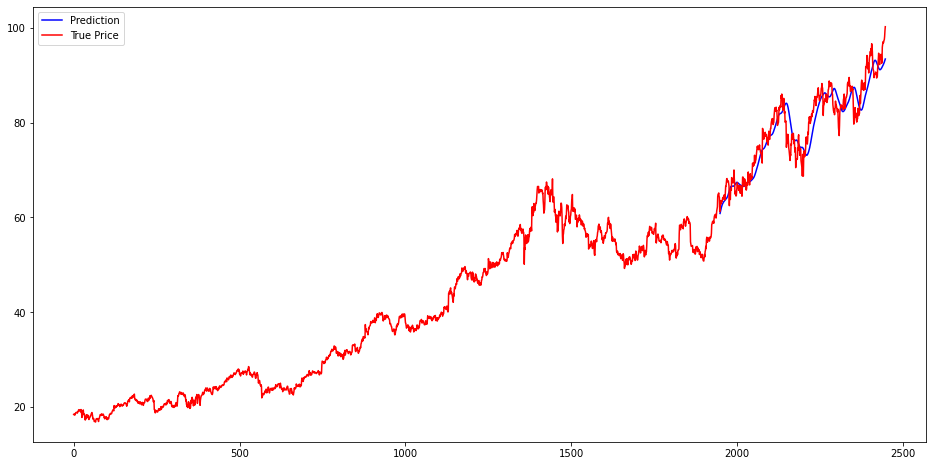

In [11]:
prediction = model.predict(x_test)
model.evaluate(x_test)

prediction = scaler.inverse_transform(prediction.reshape(1,-1))

plt.figure(figsize=(16, 8))

print(prediction.shape)

print(y_test.shape)



plt.plot(range(len(df_nke['Open'].tolist())-len(prediction[0]),len(df_nke['Open'].tolist())),prediction[0],'b-',label='Prediction')
plt.plot(df_nke['Open'].tolist(),'r-',label='True Price')
plt.legend()
plt.show()

Epoch 1/100
13/13 [==============================] - 18s 696ms/step - loss: 0.0636 - accuracy: 6.4267e-04 - val_loss: 0.0443 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 9s 693ms/step - loss: 0.0115 - accuracy: 6.4267e-04 - val_loss: 0.0142 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 7s 543ms/step - loss: 0.0048 - accuracy: 6.4267e-04 - val_loss: 0.0038 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 7s 560ms/step - loss: 0.0035 - accuracy: 6.4267e-04 - val_loss: 0.0031 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 5/100
13/13 [==============================] - 7s 546ms/step - loss: 0.0033 - accuracy: 6.4267e-04 - val_loss: 0.0022 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 6/100
13/13 [==============================] - 7s 546ms/step - loss: 0.0031 - accuracy: 6.4267e-04 - val_loss: 0.0026 - val_accuracy: 0.0026 - lr: 0.0010
Epoch 7/100
13/13 [====================

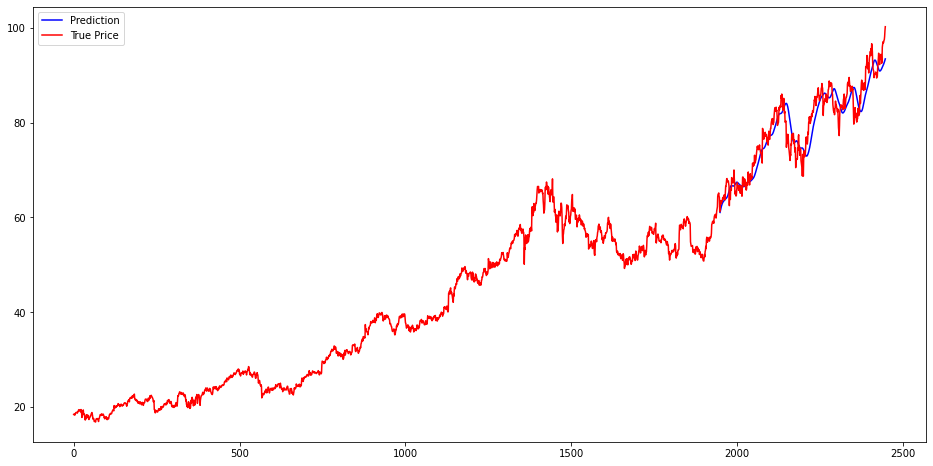

In [21]:
model = keras.Sequential()
model.add(layers.LSTM(96, return_sequences=True, input_shape=(x_train.shape[1:])))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(96, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(96,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(96))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(), loss='mse',metrics=['accuracy'])
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.7, min_lr=0.000000005)

history = model.fit(x_train, y_train,
                    batch_size = 128,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[learning_rate_reduction])

prediction = model.predict(x_test)
model.evaluate(x_test)

prediction = scaler.inverse_transform(prediction.reshape(1,-1))
plt.figure(figsize=(16, 8))
plt.plot(range(len(df_nke['Open'].tolist())-len(prediction[0]),len(df_nke['Open'].tolist())),prediction[0],'b-',label='Prediction')
plt.plot(df_nke['Open'].tolist(),'r-',label='True Price')
plt.legend()
plt.show()

# GOOGLE DATA

In [22]:
df_googl = pd.read_csv('/content/drive/MyDrive/ITCS5156/Project/GOOGL.csv')
df_googl = df_googl[['Open']]
df_googl

,Open
0,2.527778
1,2.771522
2,2.783784
3,2.626627
4,2.626376
...,...
3855,67.160500
3856,67.394997
3857,67.750000
3858,68.120499


In [23]:
train = df_googl[0:3088 + time_stamp]
test = df_googl[3088 - time_stamp:]

In [24]:
scaler = scaler.fit_transform(train)
x_train, y_train = [], []

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))

# GOOGL train & plot

In [26]:
scaled_data = scaler.fit_transform(train)
x_train, y_train = [], []

for i in range(time_stamp, len(train)-1):
    x_train.append(scaled_data[i - time_stamp:i])
    y_train.append(scaled_data[i: i+1])
x_train, y_train = np.array(x_train), np.array(y_train).reshape(-1,1)

scaled_data = scaler.fit_transform(test)
x_test, y_test = [], []
for i in range(time_stamp, len(test)-1):
    x_test.append(scaled_data[i - time_stamp:i])
    y_test.append(scaled_data[i: i+1])
x_test, y_test = np.array(x_test), np.array(y_test).reshape(-1,1)

In [37]:
y_train

array([[0.05834807],
       [0.06158205],
       [0.06121104],
       ...,
       [0.95669665],
       [0.94557735],
       [0.95562181]])

Epoch 1/100
20/20 [==============================] - 27s 820ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0016 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 11s 574ms/step - loss: 9.2594e-04 - accuracy: 0.0000e+00 - val_loss: 9.5766e-04 - val_accuracy: 0.0016 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - 11s 567ms/step - loss: 6.7587e-04 - accuracy: 0.0000e+00 - val_loss: 9.7544e-04 - val_accuracy: 0.0016 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - 12s 582ms/step - loss: 6.6391e-04 - accuracy: 0.0000e+00 - val_loss: 9.2969e-04 - val_accuracy: 0.0016 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - 11s 572ms/step - loss: 5.7068e-04 - accuracy: 0.0000e+00 - val_loss: 7.1426e-04 - val_accuracy: 0.0016 - lr: 0.0010
Epoch 6/100
20/20 [==============================] - 11s 565ms/step - loss: 6.0473e-04 - accuracy: 0.0000e+00 - val_loss: 6.9198e-04 - val_accuracy: 0.0016 - lr: 0

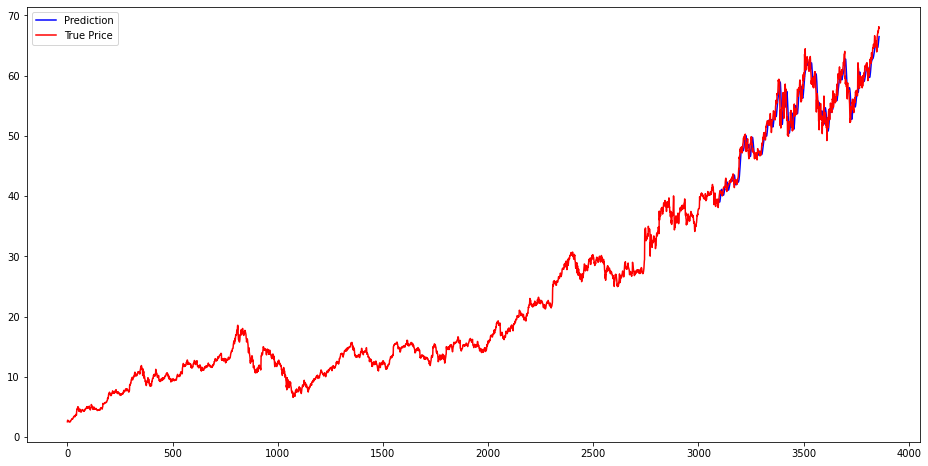

In [38]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mse',metrics=['accuracy'])
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.7, min_lr=0.000000005)

history = model.fit(x_train, y_train,
                    batch_size = 128,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[learning_rate_reduction])

prediction = model.predict(x_test)
model.evaluate(x_test)

prediction = scaler.inverse_transform(prediction.reshape(1,-1))
plt.figure(figsize=(16, 8))
plt.plot(range(len(df_googl['Open'].tolist())-len(prediction[0]),len(df_googl['Open'].tolist())),prediction[0],'b-',label='Prediction')
plt.plot(df_googl['Open'].tolist(),'r-',label='True Price')
plt.legend()
plt.show()